In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Setup the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r'Indian Currency Dataset\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="training")

validation_generator = train_datagen.flow_from_directory(
    r'Indian Currency Dataset\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset="validation")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    r'Indian Currency Dataset\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  

Found 199 images belonging to 2 classes.


Found 49 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNet model without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  

x = Flatten()(x) 
x = Dense(1024, activation='relu')(x) 
x = BatchNormalization()(x)  
x = Dropout(0.5)(x) 

x = Dense(512, activation='relu')(x)  
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(2, activation='softmax')(x)  

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [4]:
# Fit the model
history=model.fit(
    train_generator,
    epochs=10, validation_data=validation_generator)


Epoch 1/10


7/7 [==============================] - 17s 2s/step - loss: 0.7562 - accuracy: 0.7538 - val_loss: 0.3644 - val_accuracy: 0.8571
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 0.5609 - accuracy: 0.8241 - val_loss: 0.5060 - val_accuracy: 0.7755
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.5723 - accuracy: 0.8392 - val_loss: 0.4629 - val_accuracy: 0.7959
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.2679 - accuracy: 0.9246 - val_loss: 0.4229 - val_accuracy: 0.8163
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.3186 - accuracy: 0.9246 - val_loss: 1.2627 - val_accuracy: 0.5918
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.2551 - accuracy: 0.9095 - val_loss: 3.4081 - val_accuracy: 0.5306
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 0.3319 - accuracy: 0.9146 - val_loss: 2.1131 - val_accuracy: 0.6122
Epoch 8/10
7/7 [=====================

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
hist_=pd.DataFrame(history.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.756181,0.753769,0.364393,0.857143
1,0.560877,0.824121,0.505984,0.775510
2,0.572310,0.839196,0.462947,0.795918
3,0.267870,0.924623,0.422903,0.816327
4,0.318635,0.924623,1.262697,0.591837
5,0.255063,0.909548,3.408100,0.530612
6,0.331946,0.914573,2.113105,0.612245
7,0.116408,0.954774,0.867486,0.714286
8,0.262460,0.929648,0.799422,0.795918
9,0.209171,0.909548,0.427353,0.857143


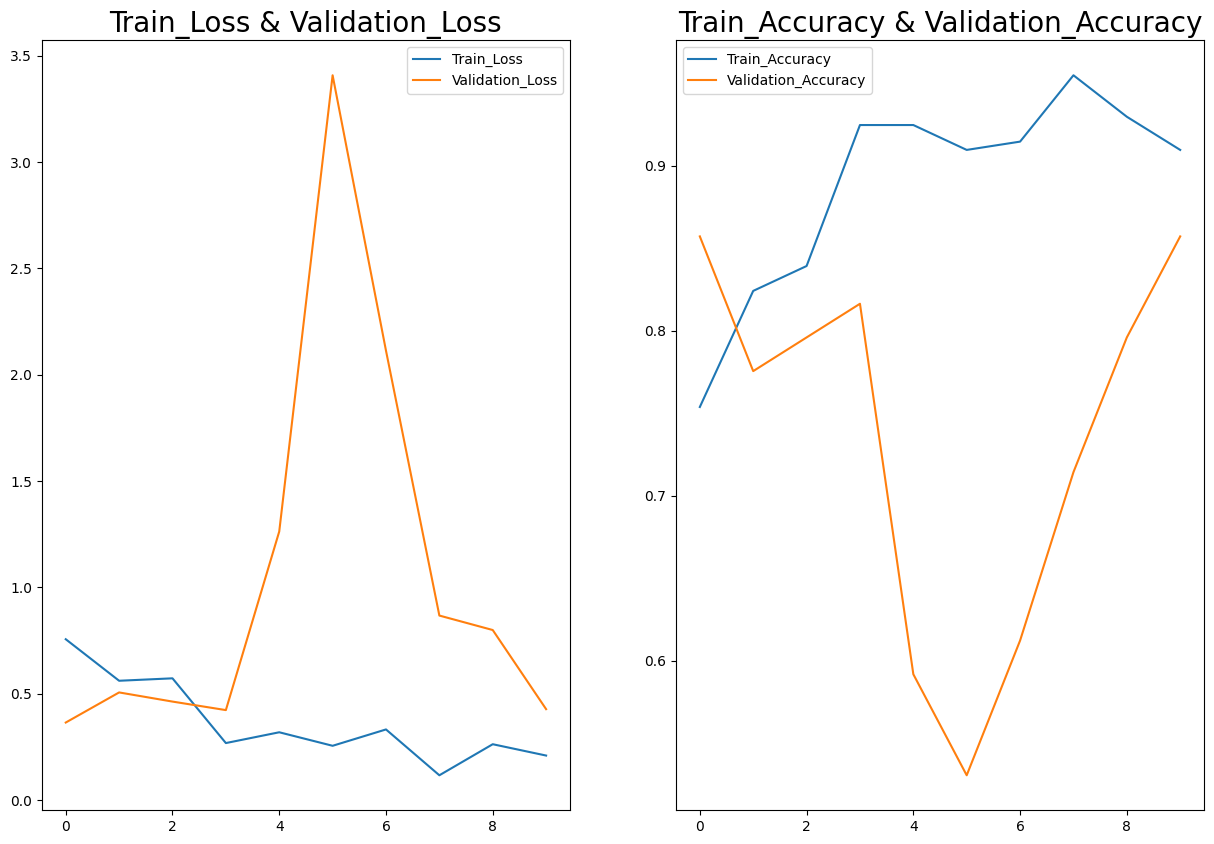

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [7]:
acc= model.evaluate(test_generator)
print('Test Accuracy =', acc)

4/4 [==============================] - 4s 1s/step - loss: 0.0807 - accuracy: 0.9720
Test Accuracy = [0.0807473212480545, 0.9719626307487488]


In [8]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions,axis=1)
y_test_ = test_generator.classes
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

4/4 [==============================] - 4s 846ms/step


,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
102,1,1
103,1,1
104,1,1
105,1,1


array([[58,  1],
       [ 2, 46]], dtype=int64)

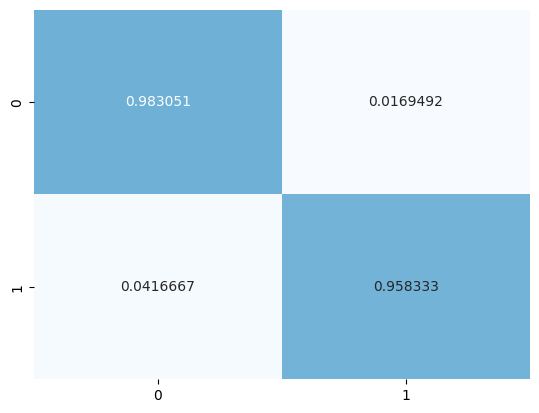

In [9]:
CM = confusion_matrix(y_test_,y_pred)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [10]:
ClassificationReport = classification_report(y_test_,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.98      0.96      0.97        48

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [11]:
model.save("mobilenet.keras")

In [17]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array, load_img

# Load the pre-trained model
model = keras.models.load_model("mobilenet.keras")

# Define image path
image_path = r"Indian Currency Dataset\test\real\test (45).jpg"

# Load and prepare the image
def prepare_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load the image
    img_array = img_to_array(img)  # Convert the image to numpy array
    img_array = img_array / 255.0  # Scale the image (if your model requires normalization)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Prepare the image
prepared_image = prepare_image(image_path, target_size=(224, 224))

# Predict using the model
predictions = model.predict(prepared_image)
predicted_class = np.argmax(predictions, axis=1)  # Get the class with highest probability

# Output the result
class_labels = ['Fake', 'Real']
predicted_class_label = class_labels[predicted_class[0]]
print(f"Predicted Class: {predicted_class_label}")

1/1 [==============================] - 0s 321ms/step
Predicted Class: Real


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNet model without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  

x = Flatten()(x) 
x = Dense(1024, activation='relu')(x) 
x = BatchNormalization()(x)  
x = Dropout(0.5)(x) 

predictions = Dense(2, activation='softmax')(x)  

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [19]:
# Fit the model
history=model.fit(
    train_generator,
    epochs=10, validation_data=validation_generator)


Epoch 1/10
7/7 [==============================] - 33s 4s/step - loss: 1.2115 - accuracy: 0.6030 - val_loss: 0.9807 - val_accuracy: 0.5102
Epoch 2/10
7/7 [==============================] - 27s 4s/step - loss: 0.9286 - accuracy: 0.5930 - val_loss: 1.5815 - val_accuracy: 0.4898
Epoch 3/10
7/7 [==============================] - 25s 4s/step - loss: 0.7847 - accuracy: 0.7136 - val_loss: 1.1677 - val_accuracy: 0.4898
Epoch 4/10
7/7 [==============================] - 25s 3s/step - loss: 0.5806 - accuracy: 0.7286 - val_loss: 0.7553 - val_accuracy: 0.4898
Epoch 5/10
7/7 [==============================] - 25s 4s/step - loss: 0.5920 - accuracy: 0.7337 - val_loss: 0.8377 - val_accuracy: 0.4898
Epoch 6/10
7/7 [==============================] - 26s 4s/step - loss: 0.5350 - accuracy: 0.7588 - val_loss: 0.6098 - val_accuracy: 0.8367
Epoch 7/10
7/7 [==============================] - 26s 4s/step - loss: 0.5682 - accuracy: 0.7186 - val_loss: 0.6414 - val_accuracy: 0.5102
Epoch 8/10
7/7 [==================

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
hist_=pd.DataFrame(history.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.211489,0.603015,0.980722,0.510204
1,0.928615,0.592965,1.581518,0.489796
2,0.784688,0.713568,1.167714,0.489796
3,0.580594,0.728643,0.755276,0.489796
4,0.592037,0.733668,0.837685,0.489796
5,0.535021,0.758794,0.609779,0.836735
6,0.568175,0.718593,0.641350,0.510204
7,0.487180,0.783920,0.646966,0.530612
8,0.464006,0.793970,0.909818,0.510204
9,0.496945,0.763819,0.807439,0.510204


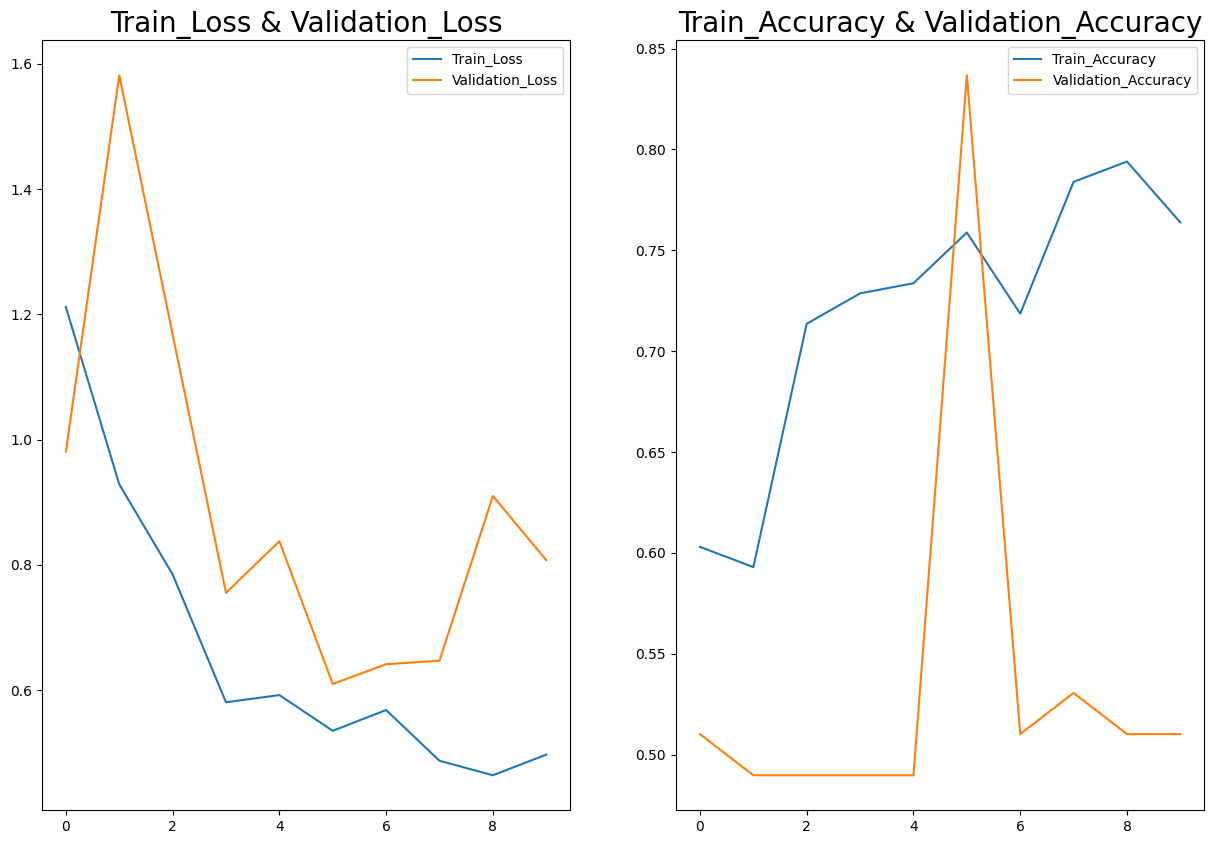

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [22]:
acc= model.evaluate(test_generator)
print('Test Accuracy =', acc)

4/4 [==============================] - 10s 2s/step - loss: 0.7944 - accuracy: 0.5514
Test Accuracy = [0.794378399848938, 0.5514018535614014]


In [23]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions,axis=1)
y_test_ = test_generator.classes
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

4/4 [==============================] - 11s 2s/step


,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
102,1,0
103,1,0
104,1,0
105,1,0


array([[59,  0],
       [48,  0]], dtype=int64)

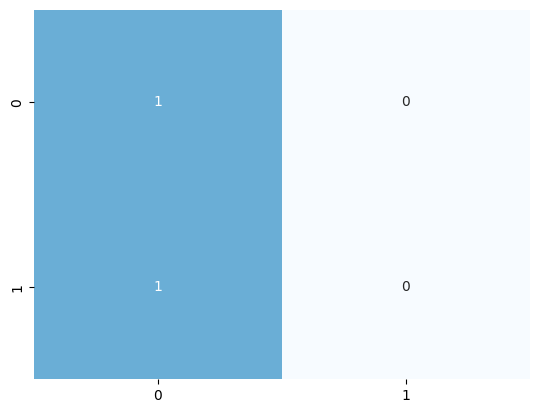

In [24]:
CM = confusion_matrix(y_test_,y_pred)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [25]:
ClassificationReport = classification_report(y_test_,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.55      1.00      0.71        59
           1       0.00      0.00      0.00        48

    accuracy                           0.55       107
   macro avg       0.28      0.50      0.36       107
weighted avg       0.30      0.55      0.39       107



C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
model.save("resnet.keras")

In [27]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array, load_img

# Load the pre-trained model
model = keras.models.load_model("resnet.keras")

# Define image path
image_path = r"Indian Currency Dataset\test\real\test (39).jpg"

# Load and prepare the image
def prepare_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)  # Load the image
    img_array = img_to_array(img)  # Convert the image to numpy array
    img_array = img_array / 255.0  # Scale the image (if your model requires normalization)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Prepare the image
prepared_image = prepare_image(image_path, target_size=(224, 224))

# Predict using the model
predictions = model.predict(prepared_image)
predicted_class = np.argmax(predictions, axis=1)  # Get the class with highest probability

# Output the result
class_labels = ['Fake', 'Real']
predicted_class_label = class_labels[predicted_class[0]]
print(f"Predicted Class: {predicted_class_label}")

1/1 [==============================] - 1s 1s/step
Predicted Class: Fake


In [3]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np 

# Load the base model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

def extract_features(generator, sample_count):
    # Assuming the model's output is 1024-dimensional features
    # Initialize arrays to hold the extracted features and labels.
    # Note: We use None for flexible sizing in the features' first dimension.
    features = np.zeros((0, 1024))  # Adjust 1024 if a different model output size is expected
    labels = np.zeros((0,))
    
    # Keep track of the number of samples processed
    processed_samples = 0
    
    for inputs_batch, labels_batch in generator:
        # Ensure not to process more than the sample_count
        if processed_samples < sample_count:
            # Predict features for the current batch of images
            features_batch = model.predict(inputs_batch)
            actual_batch_size = features_batch.shape[0]
            
            # Update the total number of processed samples
            processed_samples += actual_batch_size
            
            # Append the predicted features and the true labels to their respective arrays
            features = np.append(features, features_batch, axis=0)
            labels = np.append(labels, np.argmax(labels_batch, axis=1), axis=0)
            
            # If we've processed enough samples, break from the loop
            if processed_samples >= sample_count:
                break
        else:
            break
    
    # If we've processed more samples than needed, truncate the arrays
    if processed_samples > sample_count:
        features = features[:sample_count]
        labels = labels[:sample_count]
    
    return features, labels

train_features, train_labels = extract_features(train_generator, 200) # Adjust 200 to actual size
validation_features, validation_labels = extract_features(validation_generator, 50) # Adjust 50 to actual size




1/1 [==============================] - 0s 415ms/step


In [30]:
model.save("feature_extractor.h5")

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)

# Predict on the validation set
validation_predictions = rf.predict(validation_features)

# Evaluate the model
print("Validation Accuracy: ", accuracy_score(validation_labels, validation_predictions))
print("Classification Report:\n", classification_report(validation_labels, validation_predictions))


Validation Accuracy:  0.92
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        25
         1.0       1.00      0.84      0.91        25

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.93      0.92      0.92        50



In [5]:
confusion_matrix(validation_labels, validation_predictions)

array([[25,  0],
       [ 4, 21]], dtype=int64)

array([[25,  0],
       [ 4, 21]], dtype=int64)

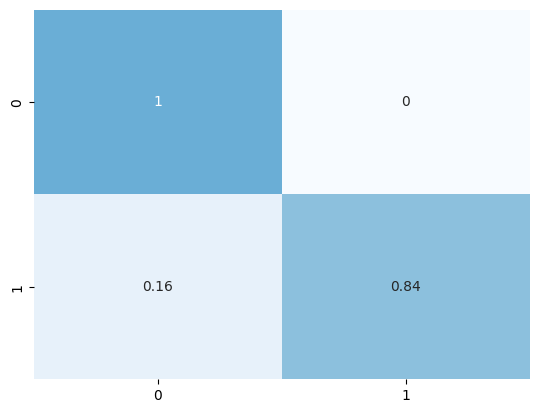

In [7]:
import seaborn as sns
CM = confusion_matrix(validation_labels, validation_predictions)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib


# It's often a good idea to scale features before using SVM
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.transform(validation_features)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0, decision_function_shape='ovo')
svm_model.fit(train_features_scaled, train_labels)

# Predict on the validation set
validation_predictions = svm_model.predict(validation_features_scaled)

# Evaluate the model
print("Validation Accuracy: ", accuracy_score(validation_labels, validation_predictions))
print("Classification Report:\n", classification_report(validation_labels, validation_predictions))


Validation Accuracy:  0.9
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        25
         1.0       1.00      0.80      0.89        25

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.90        50
weighted avg       0.92      0.90      0.90        50



In [9]:
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [10]:
confusion_matrix(validation_labels, validation_predictions)

array([[25,  0],
       [ 5, 20]], dtype=int64)

array([[25,  0],
       [ 5, 20]], dtype=int64)

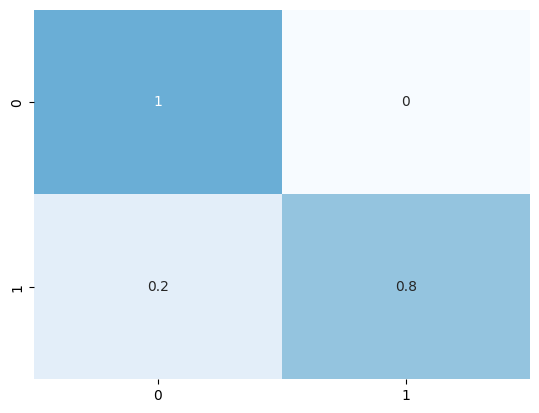

In [11]:
import seaborn as sns
CM = confusion_matrix(validation_labels, validation_predictions)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [36]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [48]:
from tensorflow.keras.models import load_model
import joblib
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
def load_and_preprocess_image(image_path):
    # Load the image file, resizing it to 224x224 pixels (as expected by MobileNet)
    img = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match the shape expected by the pre-trained model: (1, 224, 224, 3)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Preprocess the image for the pre-trained model
    return preprocess_input(img_array_expanded)

# Load the feature extraction model
feature_extraction_model_path = 'feature_extractor.h5'
feature_extraction_model = load_model(feature_extraction_model_path)

# Load the scaler
scaler_path = 'scaler.save'
scaler = joblib.load(scaler_path)

# Load the SVM classifier
svm_classifier_path = 'svm_model.pkl'
svm_classifier = joblib.load(svm_classifier_path)

# Assuming you have a function to load and preprocess images named `load_and_preprocess_image`
preprocessed_image = load_and_preprocess_image(r'Indian Currency Dataset\test\real\test (46).jpg')

# Extract features
features = feature_extraction_model.predict(preprocessed_image)

# Scale features
scaled_features = scaler.transform(features.reshape(1, -1))

# Predict with the SVM model
predicted_class = svm_classifier.predict(scaled_features)
print("Predicted class:", predicted_class)
if predicted_class==0:
    result="Fake"
    print(result)
else:           
    result="Real" 
    print(result)

1/1 [==============================] - 0s 336ms/step
Predicted class: [1.]
Real
